# Analyse du parcours étudiant et des facteurs de succès professionnel

## Introduction

Cette analyse explore un ensemble de données riche concernant les parcours académiques et professionnels d'étudiants. Les données couvrent quatre dimensions principales : informations personnelles, performances académiques, compétences et activités extrascolaires, et résultats de carrière. L'objectif est d'identifier les facteurs qui influencent la réussite professionnelle et de comprendre les corrélations entre les différentes étapes du parcours étudiant.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Columns Description
1. Student Information
- Student_ID – Unique identifier for each student
- Age – Age of the student (18-30 years)
- Gender – Male, Female, or Other
2. Academic Performance
- High_School_GPA – High school GPA (2.0 - 4.0 scale)
- SAT_Score – Standardized test score (900 - 1600)
- University_Ranking – Ranking of the university attended (1-1000)
- University_GPA – University GPA (2.0 - 4.0 scale)
- Field_of_Study – Major or discipline (e.g., Computer Science, Medicine, Business)
3. Skills & Extracurricular Activities
- Internships_Completed – Number of internships completed (0-4)
- Projects_Completed – Number of personal/academic projects completed (0-9)
- Certifications – Number of additional certifications earned (0-5)
- Soft_Skills_Score – Soft skills rating (1-10)
- Networking_Score – Score based on professional networking and connections (1-10)
4. Career Outcomes
- Job_Offers – Number of job offers received after graduation (0-5)
- Starting_Salary – First job salary in USD ($25,000 - $150,000)
- Career_Satisfaction – Career satisfaction level (1-10)
- Years_to_Promotion – Time taken to receive the first promotion (1-5 years)
- Current_Job_Level – Career level (Entry, Mid, Senior, Executive)
- Work_Life_Balance – Work-life balance rating (1-10)
- Entrepreneurship – Whether the individual started a business (Yes/No)

In [3]:
def load_dataset_part(parts: list):
    df = pd.read_csv('datasets/ds.csv')
    if not 1 in parts:
        df = df.drop(["Age", "Gender"], axis=1)
    if not 2 in parts:
        df = df.drop(["High_School_GPA", "SAT_Score", "University_Ranking", "University_GPA", "Field_of_Study"], axis=1)
    if not 3 in parts:
        df = df.drop(["Internships_Completed", "Projects_Completed", "Certifications", "Soft_Skills_Score", "Networking_Score"], axis=1)
    if not 4 in parts:
        df = df.drop(["Job_Offers", "Starting_Salary", "Career_Satisfaction", "Years_to_Promotion", "Current_Job_Level", "Work_Life_Balance", "Entrepreneurship"], axis=1)
    return df

In [4]:
df = load_dataset_part([1])
df.loc[:,"Gender"].value_counts()

Gender
Male      2458
Female    2350
Other      192
Name: count, dtype: int64

## Analyse des disparités sociales

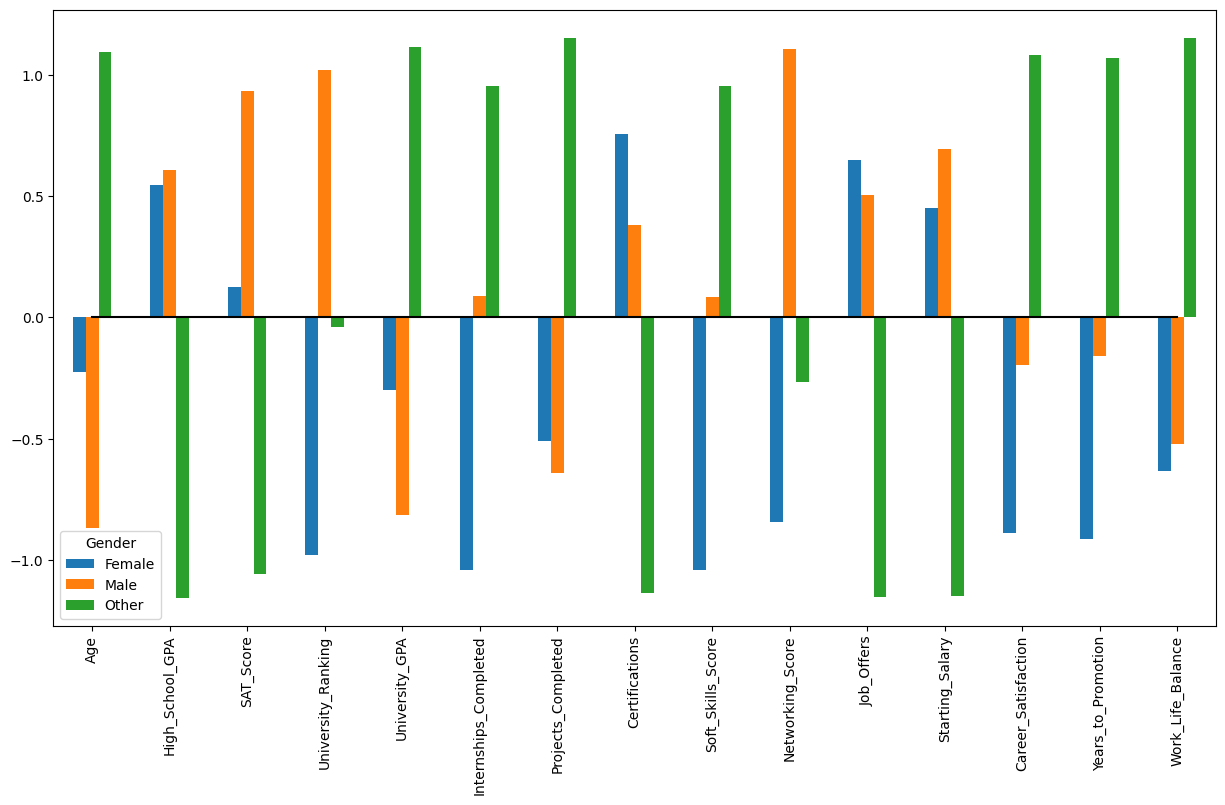

In [5]:
df = load_dataset_part([1,2,3,4])
df_s = df.drop(["Student_ID"], axis=1)
dfs = df_s.groupby("Gender").mean(numeric_only=True)
normalized_df=(dfs-dfs.mean())/dfs.std()
normalized_df.T.plot(kind='bar', figsize=(15,8))
plt.plot([i for i in range(15)], np.zeros(15), 'k')
plt.show()

La visualisation des données normalisées par genre permet d'identifier d'éventuelles disparités entre les hommes, les femmes et les personnes non-binaires (catégorie "Other").

On remarque que la différence globale est toujours presque compris dans $ \pm 1 \sigma $.
Il n'y a donc pas tant de fluctuations entre les genres.

Cependant, on remarque que le genre "Other" est en moyenne plus souvent proche des $ \pm 1 \sigma $ que les autres genres.

Entre hommes et femmes, c'est assez difficile de dire qui est le plus avantagé, car en moyenne, il y a autant de bar pour les femmes que pour les hommes qui sont éloigné de la moyenne.

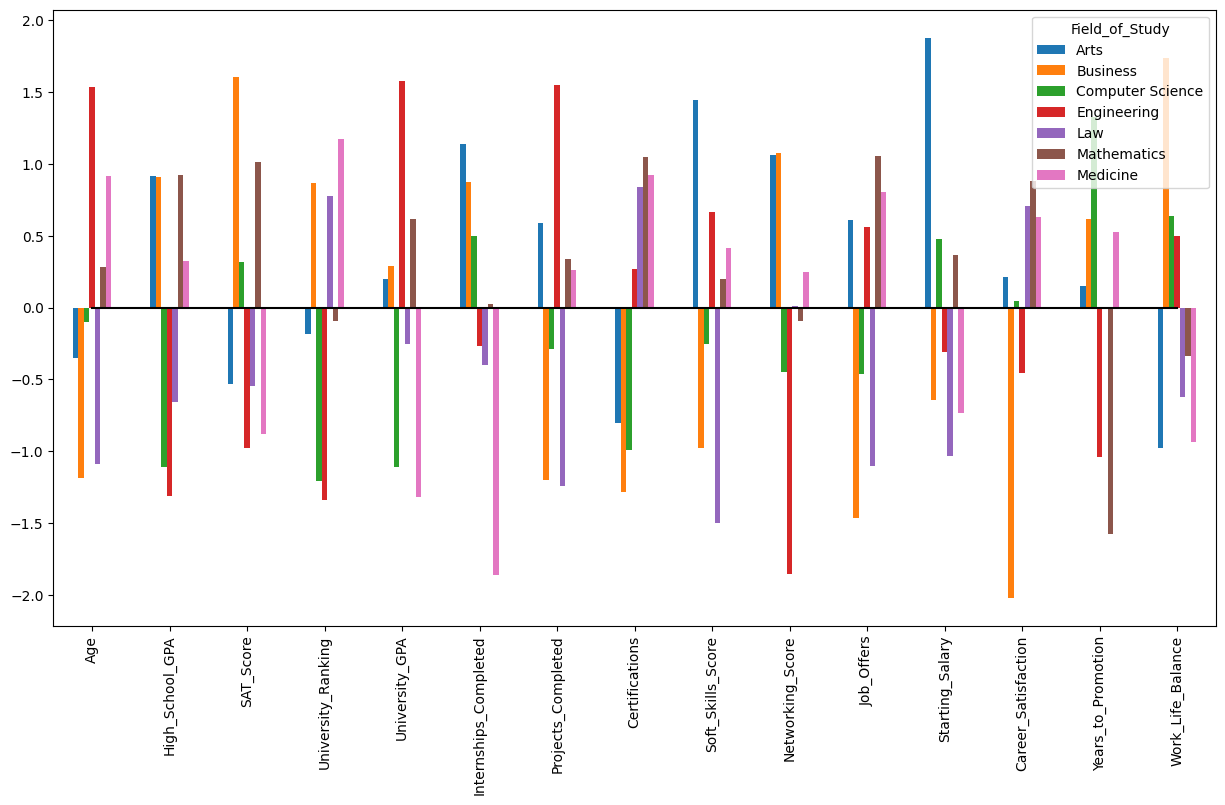

In [6]:
df = load_dataset_part([1,2,3,4])
df_s = df.drop(["Student_ID"], axis=1)
dfs = df_s.groupby("Field_of_Study").mean(numeric_only=True)
normalized_df=(dfs-dfs.mean())/dfs.std()
normalized_df.T.plot(kind='bar', figsize=(15,8))
plt.plot([i for i in range(15)], np.zeros(15), 'k')
plt.show()

La comparaison des moyennes normalisées entre les différents domaines d'études (informatique, médecine, commerce, etc.) révèle comment chaque discipline influence les résultats académiques et professionnels.

Contrairement aux genres, les domaines d'études ont des différences plus marquées.

Par exemple, pour tout proportions gardé, les étudiants en médecine ont plus abandonné que les autres étudiants.

De même, les étudiants en buisness sont beaucoup moins satisfait de leurs carrière que les autres étudiants.

Ou encore, les étudiants en arts commencent avec un salaire plus élevé que les autres étudiants. 

(etc...)

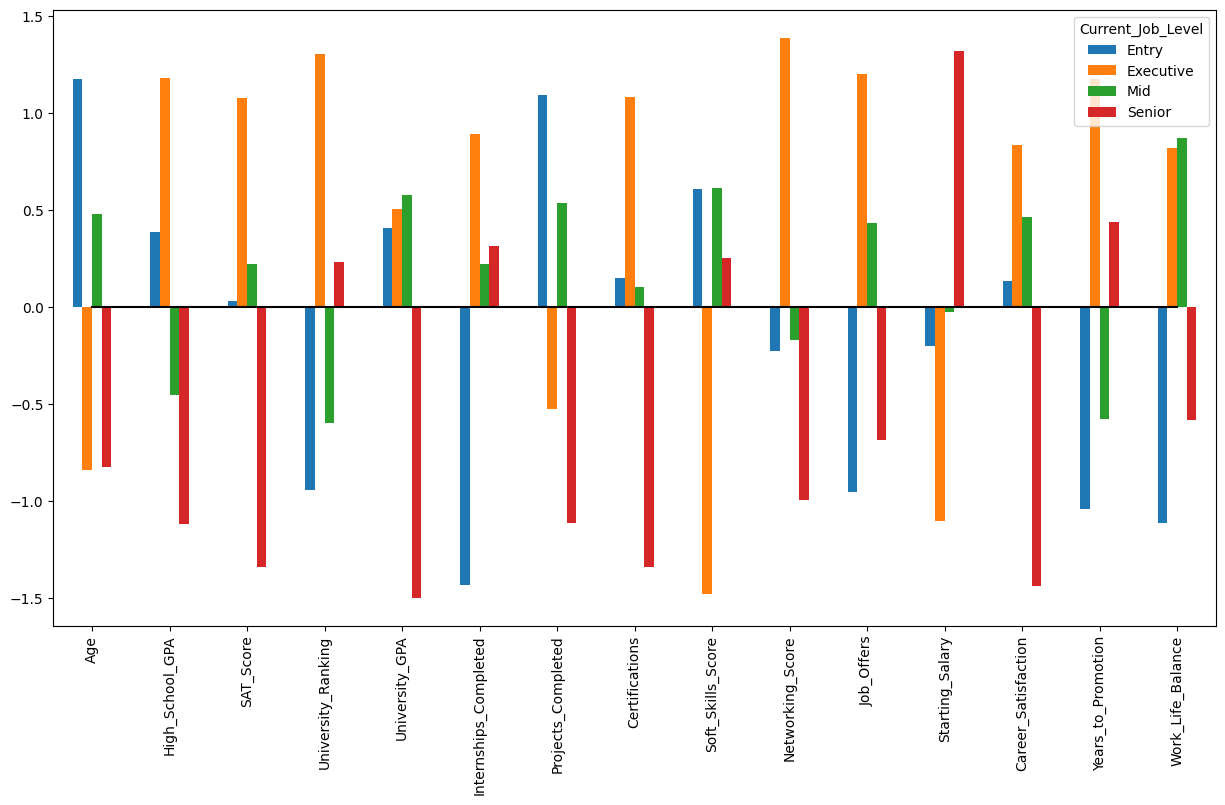

Current_Job_Level
Entry        2463
Mid          1544
Senior        770
Executive     223
Name: count, dtype: int64

In [7]:
df = load_dataset_part([1,2,3,4])
df_s = df.drop(["Student_ID"], axis=1)
dfs = df_s.groupby("Current_Job_Level").mean(numeric_only=True)
normalized_df=(dfs-dfs.mean())/dfs.std()
normalized_df.T.plot(kind='bar', figsize=(15,8))
plt.plot([i for i in range(15)], np.zeros(15), 'k')
plt.show()
df_s.loc[:, "Current_Job_Level"].value_counts()

L'analyse par niveau d'emploi (Entry, Mid, Senior, Executive) illustre les facteurs qui influencent le début de carrière professionnel.

Déjà on remarque que la majorité des étudiants sortant sont à un niveau d'emploi "Entry" et "Mid".

On remarque que pour les étudiants qui deviennent "Executive" sont des cas particuliers par rapport aux autres étudiants:
Ils proviennent de l'université avec un GPA plus faible (étrangement), ils ont moins de certifications, ils commencent avec un salaire beaucoup plus élevé et sont moins satisfait de leur carrière.

Evidement sur ces 3 graphiques, on peut extraire plus d'informations et de corrélations, ainsi que de chercher les causes de ces corrélations et informations.

## Etude de corrélations 

In [8]:
df = load_dataset_part([3]).drop(["Student_ID"], axis=1)

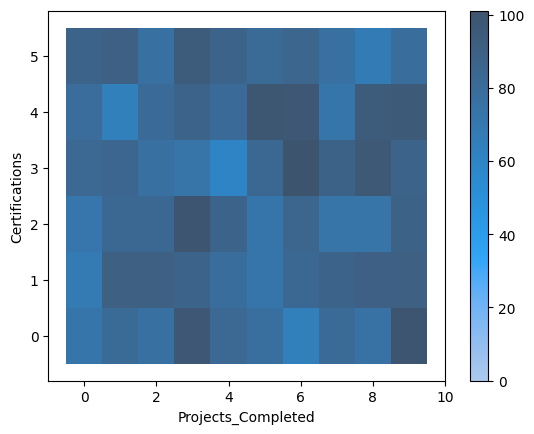

In [9]:
sns.histplot(x=df["Projects_Completed"], y=df["Certifications"], data=df, bins=21, cbar=True, discrete=(True, True))
plt.show()

On remarque ici que la quantité de certification et le nombre de projets réalisés et finis ne sont pas corrélés.

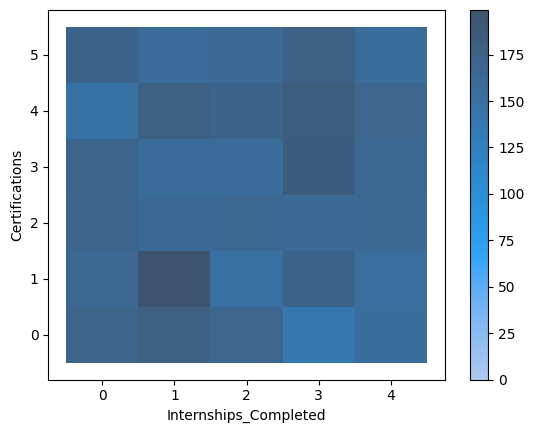

In [10]:
sns.histplot(x=df["Internships_Completed"], y=df["Certifications"], data=df, bins=21, cbar=True, discrete=(True, True))
plt.show()

De même pour le nombre de stages réalisés et le nombre de certifications.

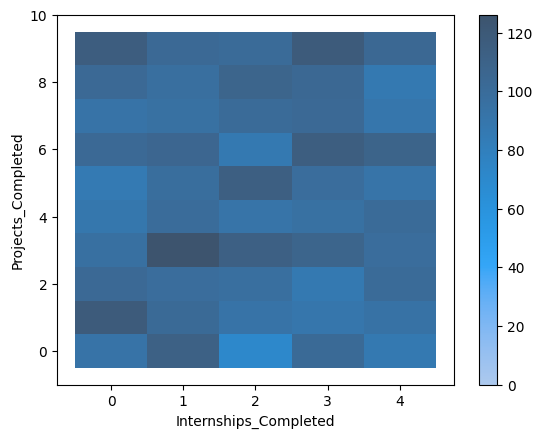

In [11]:
sns.histplot(x=df["Internships_Completed"], y=df["Projects_Completed"], data=df, bins=21, cbar=True, discrete=(True, True))
plt.show()

Et enfin, le nombre de stages réalisés et le nombre de projets réalisés ne sont pas corrélés, également.

In [12]:
df.corr()

,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score
Internships_Completed,1.000000,0.013750,0.023569,0.034905,0.004430
Projects_Completed,0.013750,1.000000,-0.010602,0.015033,0.000466
Certifications,0.023569,-0.010602,1.000000,-0.014266,-0.001476
Soft_Skills_Score,0.034905,0.015033,-0.014266,1.000000,0.010198
Networking_Score,0.004430,0.000466,-0.001476,0.010198,1.000000


De façon plus concises, on a le tableau de corrélation qui peut etre généré par la fonction `corr()` de pandas.

Regardons maintenant si il y a d'autres corrélations intéressantes linéaire.

In [13]:
df = load_dataset_part([2,4]).drop(["Student_ID", "Field_of_Study", "Current_Job_Level", "Entrepreneurship"], axis=1)
df.corr()

,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
High_School_GPA,1.000000,-0.018129,0.014341,0.004969,0.016809,-0.009152,-0.023750,-0.009684,-0.018028
SAT_Score,-0.018129,1.000000,0.006149,0.017922,0.019301,0.002776,0.002960,0.015944,0.017031
University_Ranking,0.014341,0.006149,1.000000,-0.004471,0.013199,0.021368,-0.011613,0.000803,0.011669
University_GPA,0.004969,0.017922,-0.004471,1.000000,-0.014875,0.001022,-0.003371,0.011024,0.018964
Job_Offers,0.016809,0.019301,0.013199,-0.014875,1.000000,-0.034014,-0.007675,0.016932,-0.009564
Starting_Salary,-0.009152,0.002776,0.021368,0.001022,-0.034014,1.000000,0.002422,0.005674,0.006371
Career_Satisfaction,-0.023750,0.002960,-0.011613,-0.003371,-0.007675,0.002422,1.000000,-0.006322,0.015988
Years_to_Promotion,-0.009684,0.015944,0.000803,0.011024,0.016932,0.005674,-0.006322,1.000000,0.007336
Work_Life_Balance,-0.018028,0.017031,0.011669,0.018964,-0.009564,0.006371,0.015988,0.007336,1.000000


On remarque étrangement qu'il n'y pas de corrélation entre les paramètres du dataset.

Regardons maintenant si il y a des corrélations entre les offres d'emplois et le domaine d'étude.

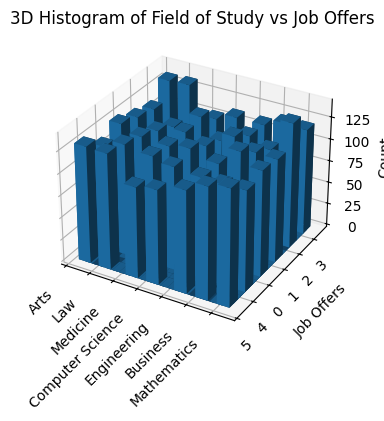

In [23]:
df = load_dataset_part([2,4])
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
hist, xedges, yedges = np.histogram2d(df["Field_of_Study"].factorize()[0], df["Job_Offers"], bins=21)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")

xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_ylabel('Job Offers')
ax.set_zlabel('Count')
ax.set_xticks(np.arange(len(df["Field_of_Study"].unique())))
ax.set_xticklabels(df["Field_of_Study"].unique(), rotation=45, ha='right')
ax.set_yticks(np.arange(len(df["Job_Offers"].unique())))
ax.set_yticklabels(df["Job_Offers"].unique(), rotation=45, ha='right')
plt.title('3D Histogram of Field of Study vs Job Offers')
plt.show()

Les domaines d'études sont globalement homogénes.

Il y a peu de disparités entre les domaines d'études concernant les offres d'emplois.

In [24]:
df_s = df.drop(["Student_ID"], axis=1)
df_s.groupby(by=["Field_of_Study"]).mean(numeric_only=True)

,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
Field_of_Study,,,,,,,,,
Arts,3.016636,1249.184246,503.289720,3.025834,2.503338,51422.830441,5.607477,3.025367,5.369826
Business,3.016439,1267.638387,509.031989,3.028484,2.453408,50262.169680,5.289291,3.051460,5.685675
Computer Science,2.972119,1256.541791,497.674627,2.984716,2.477612,50777.164179,5.583582,3.091045,5.558209
Engineering,2.967660,1245.329529,496.938659,3.068916,2.502140,50416.547789,5.512126,2.958631,5.542083
Law,2.982077,1249.033012,508.557084,3.011541,2.462173,50081.155433,5.678129,3.016506,5.411279
Mathematics,3.016779,1262.524832,503.782550,3.038819,2.514094,50725.906040,5.703356,2.928859,5.444295
Medicine,3.003614,1246.156749,510.718433,2.978128,2.507983,50219.158200,5.667634,3.046444,5.374456


In [25]:
df_s.groupby(by=["Field_of_Study"]).std(numeric_only=True)

,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
Field_of_Study,,,,,,,,,
Arts,0.579034,202.449329,293.319801,0.560816,1.736384,14323.288859,2.831875,1.442535,2.914228
Business,0.566837,209.122660,289.896399,0.581563,1.711907,14593.643015,2.841159,1.394925,2.876512
Computer Science,0.564554,201.203451,288.424376,0.582753,1.695490,14636.989642,2.893945,1.431780,2.862371
Engineering,0.581334,207.811408,286.145723,0.566666,1.693368,14684.733961,2.889179,1.388627,2.889392
Law,0.574225,203.900057,287.092515,0.580266,1.756025,14705.451091,2.916346,1.421888,2.813297
Mathematics,0.572706,201.656306,298.833068,0.575160,1.723533,14296.533624,2.817820,1.428036,2.896034
Medicine,0.590522,195.656598,293.895378,0.583282,1.665399,14247.630725,2.909210,1.411391,2.928258


On remarque que les données sont homogènes entre les domaines d'études. Elles ont globalement la même moyenne et la même variance.

Regardons maintenant si il y a des corrélations en rapport avec le salaire, chose qui intéresse beaucoup de monde.

In [29]:
df = load_dataset_part([1, 2, 3, 4])
df_s = df.drop(["Student_ID"], axis=1)
df_s

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


<Axes: xlabel='Gender', ylabel='Starting_Salary'>

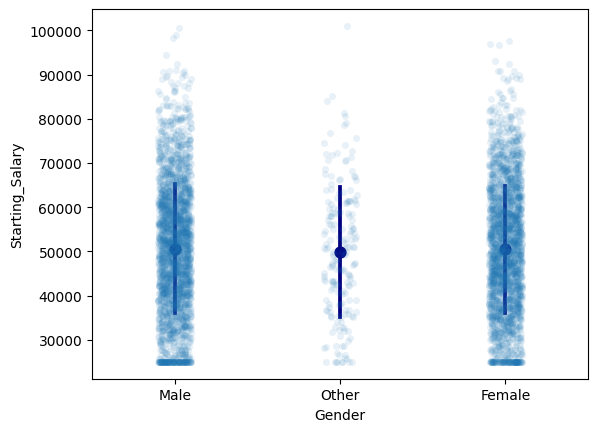

In [54]:
# scatter plot entre le sex et le salaire
sns.stripplot(x=df_s["Gender"], y=df_s["Starting_Salary"], dodge=True, alpha=0.1)
sns.pointplot(x=df_s["Gender"], y=df_s["Starting_Salary"], linestyle="none",  errorbar="sd", color="navy")

Comme on s'y attendait, il y a beaucoup moins de personnes d'autre genre que de femmes et d'hommes.

De plus on remarque qu'il y a une concentration de personnes (hommes et femmes) au minimum de salaire, c'est le smic.

Cependant, on remarque que la distribution des salaires est globalement homogène.

<Axes: xlabel='Field_of_Study', ylabel='Starting_Salary'>

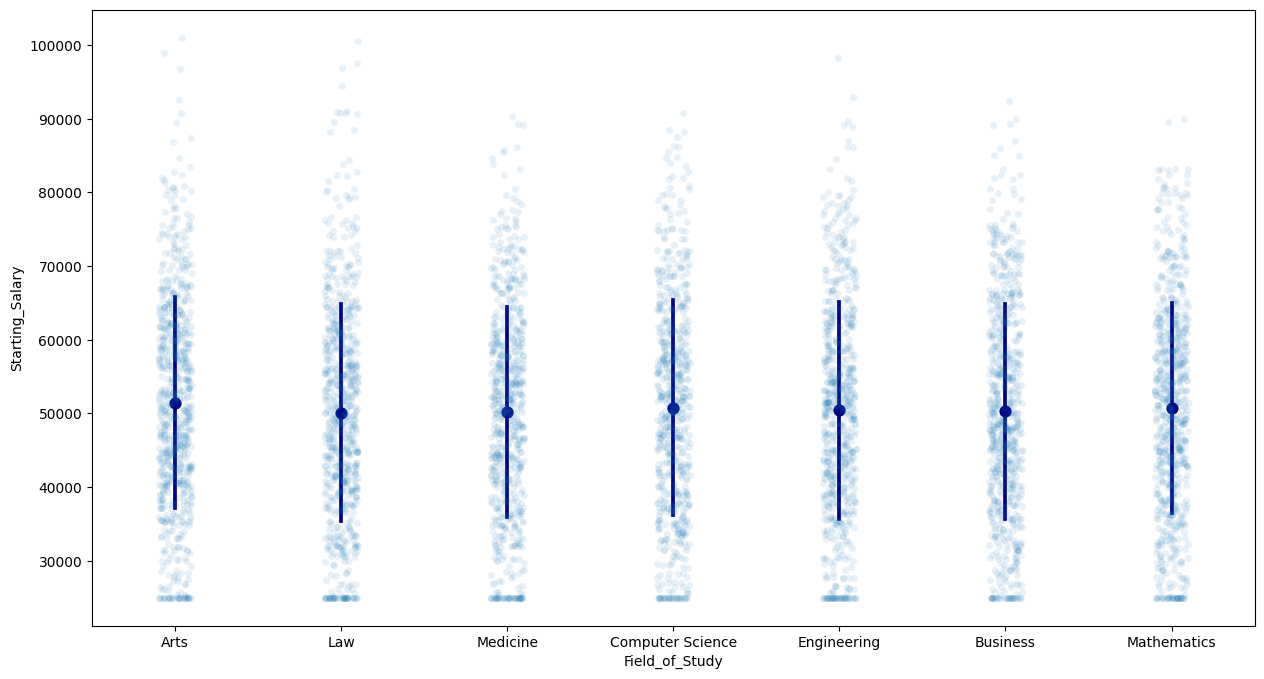

In [55]:
plt.figure(figsize=(15, 8))
sns.stripplot(x=
    df_s["Field_of_Study"],
    y=df_s["Starting_Salary"],
    dodge=True,
    alpha=0.1,
)
sns.pointplot(x=df_s["Field_of_Study"], y=df_s["Starting_Salary"], linestyle="none",  errorbar="sd", color="navy")

De même, on remarque que la distribution des salaires est globalement homogène, et qu'il y a une concentration de personnes au minimum de salaire, au smic.

Cependant, on remarque que en art, droit et ingénierie, il y a quelqus personnes qui ont un salaire très élevé. Plus de 90k.

<Axes: xlabel='Current_Job_Level', ylabel='Starting_Salary'>

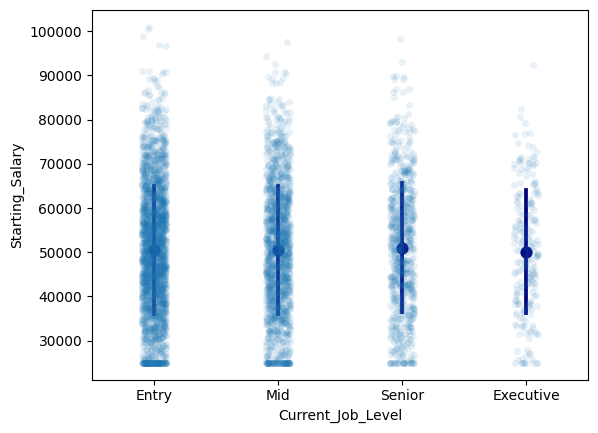

In [53]:
sns.stripplot(x=df_s["Current_Job_Level"], y=df_s["Starting_Salary"], dodge=True, alpha=0.1)
sns.pointplot(x=df_s["Current_Job_Level"], y=df_s["Starting_Salary"], linestyle="none",  errorbar="sd", color="navy")

On remarque que la majorité des étudiants sont à un niveau d'emploi "Entry" et peu de personnes sont à un niveau d'emploi "Executive".

De plus on remarque que la majorité étant au smic sont des étudiants au niveau d'emploi "Entry" et "Mid".

On remarque également qu'il y a une plus grande dispersion des salaires pour les étudiants au niveau d'emploi "Entry", mais rien de très significatif.

Les moyennes de salaires sont globalement homogènes entre les niveaux d'emplois.

## Questions:

Quelle est la corrélation entre les stages effectué et la réussite? Aucune

Si un étiduiant commence sa carrière en tant que cadre, gagne t il plus d'argent? Non, par contre peu d'étudiant commence cadre

Y a t il de grandes disparité de réussite, de salaire etc entre les genre? Non, globalement les écart sont limité a 1 écart type

# Conclusion

Ce dataset est globalement homogéne et présente peu de différence entre les catégories, de corrélations et est globalement homogéne